In [31]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.datasets import make_moons

PUNTO 1

In [49]:
# Generación de lunas
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

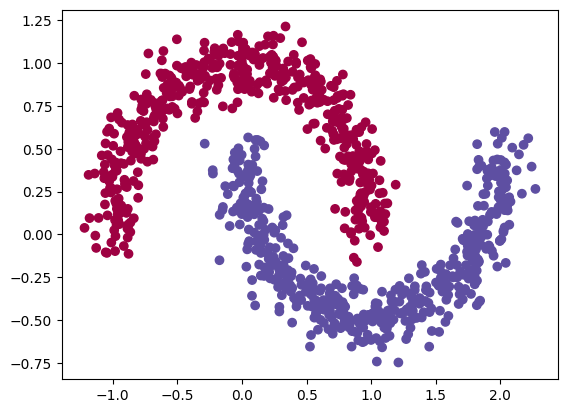

In [52]:
#Gráfico de estructura de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [53]:
# Creacion del modelo
# Tendrá 3 capas con dos tipos de función de activación
# La metrica será de precisión
def build_model(activation = 'sigmoid', loss='binary_crossentropy', input_dim=2): # Funciones de activación para cada capa
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=input_dim, activation='relu')) # Primera capa función relu
  model.add(keras.layers.Dense(8, activation='relu')) # Segunda capa
  model.add(keras.layers.Dense(1, activation = activation)) # Ultima capa
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4689 - loss: 0.8118 - val_accuracy: 0.4720 - val_loss: 0.7809
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4445 - loss: 0.7921 - val_accuracy: 0.4240 - val_loss: 0.7524
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 0.7525 - val_accuracy: 0.2140 - val_loss: 0.7330
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2609 - loss: 0.7317 - val_accuracy: 0.1960 - val_loss: 0.7233
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1932 - loss: 0.7254 - val_accuracy: 0.1960 - val_loss: 0.7153
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2260 - loss: 0.7122 - val_accuracy: 0.2060 - val_loss: 0.7087
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2057 - loss: 0.7077 - val_accuracy: 0.2260 - val_loss: 0.7037
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 0.7021 - val_accuracy: 0

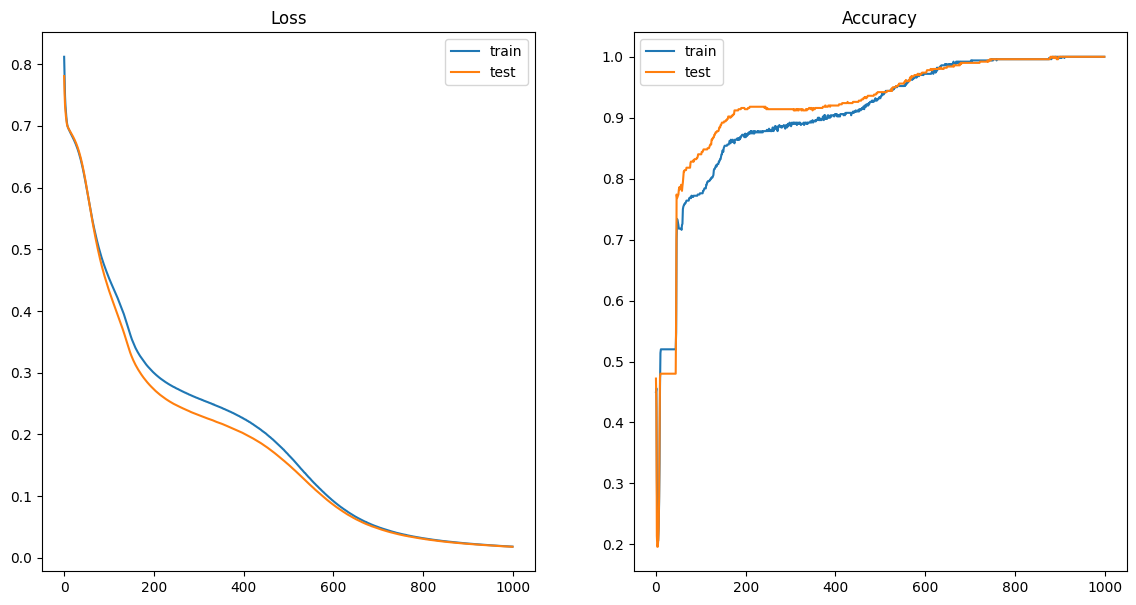

In [59]:
keras.backend.clear_session()
#Preprocesado
# Numero de datos de test y entrenamiento
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model() # Aplicación del modelo
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1) # A mayor Epochs mejor precisión en la clasificación
#Evaluacion
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
#Gráfica
plt.figure(figsize=(14,7))
#Gráfica de perdida
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#Grafica de la precision
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

1041/1041 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


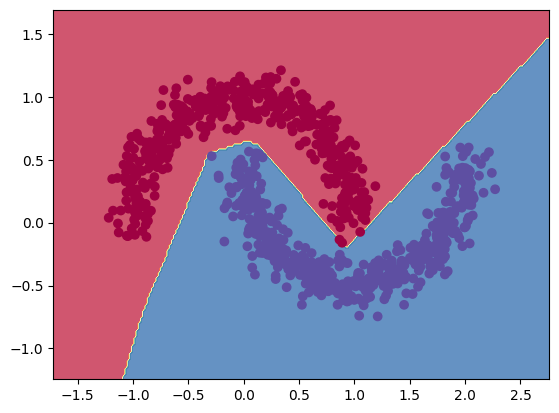

In [60]:
# Gráfica de la frontera de decisión dada por el clasificador
# A mayor 'epochs' mejor clasificación
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int) # Con una clasificación binaria
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


# Gráfica
plot_decision_boundary(model, X, y)

PUNTO 2

In [81]:
#Clasificación de los datos para digits

# Carga de datos
digits = load_digits(n_class=6)
X, y = digits.data, digits.target # Definición de las caracteriscas (Tipos de numeros) y las muestras(Cantidad de numeros), 'X' , 'y'
n_samples, n_features = X.shape
print(f"{n_samples} muestras y {n_features} características")

1083 muestras y 64 características


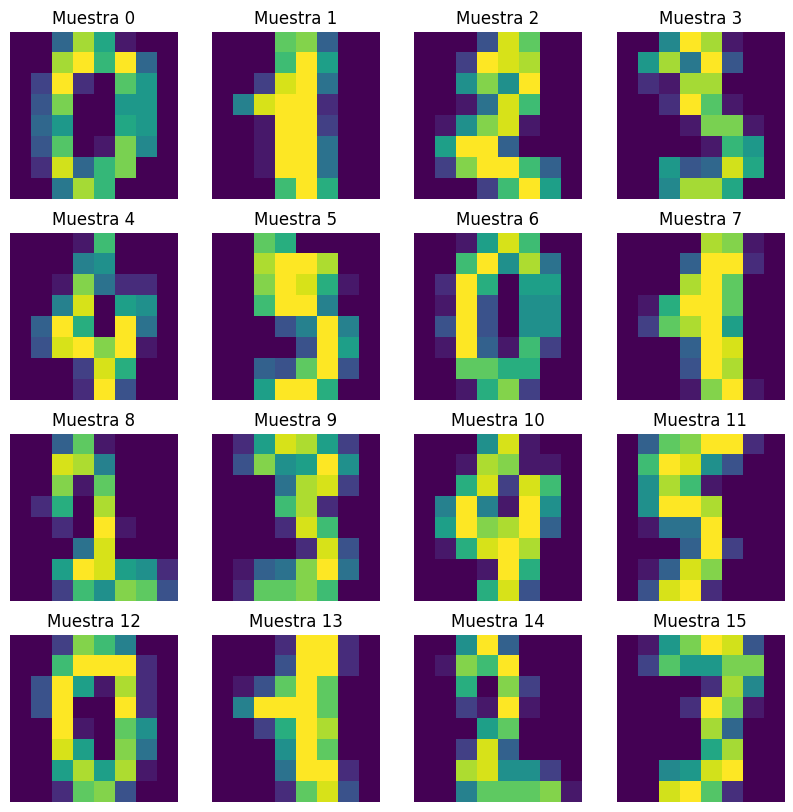

In [82]:
# Comportamiento de las caracteristicas respecto al numero de muestras en cada matriz
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X[i].reshape(8, 8))
    plt.axis("off")
    plt.title(f"Muestra {i}")
plt.show()


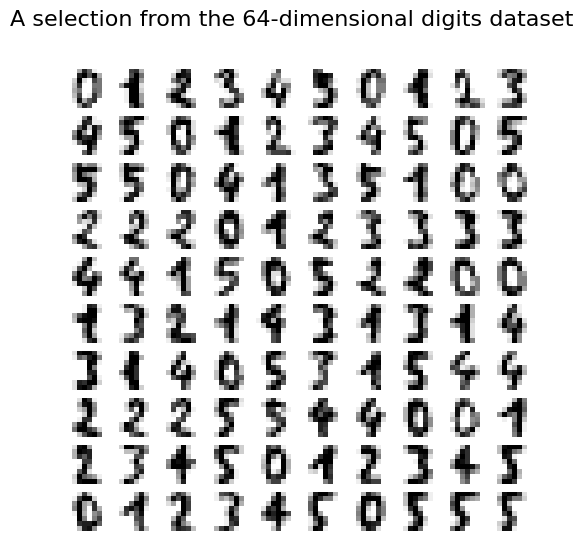

In [83]:
# Dibujo de la estructura de los datos respecto sus caracteristicas (tipo de numero) y el numero de muestras (cantidad de numeros)
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Creación del modelo de clasificación
# Tendrá 3 capas
# Las funciones de activación serán 'relu', 'softmax'
# Tipo de métrica será 'accuracy'
def build_model2():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(128, input_dim=64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(6, activation='softmax'))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5040 - loss: 3.5999 - val_accuracy: 0.8986 - val_loss: 0.2658
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.1608 - val_accuracy: 0.9493 - val_loss: 0.1527
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0880 - val_accuracy: 0.9908 - val_loss: 0.0747
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0629 - val_accuracy: 0.9908 - val_loss: 0.0555
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0508 - val_accuracy: 0.9954 - val_loss: 0.0432
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0360 - val_accuracy: 0.9908 - val_loss: 0.0404
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0287 - val_accuracy: 0.9816 - val_loss: 0.0551
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0300 - val_accuracy: 0.9954 - v

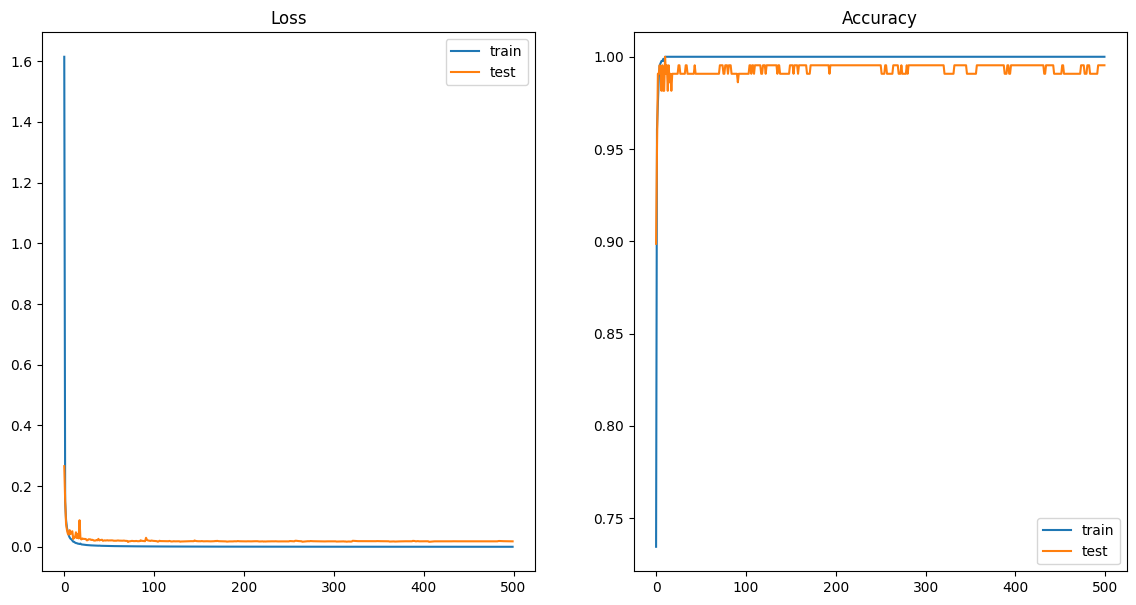

In [85]:
#Preprocesado
keras.backend.clear_session()
model = build_model2()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=1) # Mejora en la precisión con un mayor 'Epochs', pero con un rango máximo. Después se convierte en overfitting
#Evaluacion
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
#Grafica
plt.figure(figsize=(14,7))
#Grafica de perdida
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#Grafica de precision
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()